In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
%matplotlib inline

In [43]:
class MultiLogisticRegression():
    
    # definimos el constructor
    def __init__(self):
        
        self.weights = None
        self.bias = None
        
    # metodo predict, utilizamos la sentencia pass para que na haya un error, ya que este
    # metodo se implementará después
        
    def predict(self,X):
        
        z = X.dot(self.weights) + self.bias
        
        ez = np.exp(z)
        
        sum_ez = ez.sum(axis=1).reshape(-1,1)
            
        return ez/sum_ez
    
    def predict_class(self,X):
        
        y_pred = self.predict(X)
        
        y_pred = y_pred.argmax(axis=1).reshape(-1,1)
        
        return y_pred
    
    def accuracy(self,X,y):
        
        y_pred = self.predict_class(X)
        
        y = y.argmax(axis=1).reshape(-1,1)
        
        return len(y[y==y_pred])/len(y)
    
    
    # metodo loss, calcula el valor de la función de pérdida
    
    def loss(self,X,y):
        
        n = y.shape[0]
        
        y_pred = self.predict(X)
        
        return (-1/n)*np.sum(np.sum(y*np.log(y_pred))) 
    
    
    def gradient(self,X,y):
        
        # n es el número de renglones de la matriz X
        
        n = X.shape[0]
    
        O = np.ones((n,1))
        
        y_pred = self.predict(X)
    
        DW = (-1/n)*(X.T).dot((y-y_pred)) 
    
        Db = (-1/n)*(O.T).dot((y-y_pred))
    
        return DW , Db

                   
        
    # metdo fit para ajustar el modelo
    
    def fit(self,X,y,epochs=1,batch_size=1,lr=0.001,val_data=None,seed=None):
        
        # n = número de observaciones
        # p = número de características
        
        n = X.shape[0]
        p = X.shape[1]  
        
        k = y.shape[1]
        
        np.random.seed(seed)
        
        # inicialización de los pesos y los bias
        
        self.weights = np.random.normal(size=(p,k))
        
        self.bias = np.random.normal(size=(1,k))
        
        self.history = {'loss':[]}
        
        if val_data != None:
            
            self.history['val_loss'] = []
        
        for i in range(epochs):
            
            sample = np.random.choice(n,batch_size,replace=False)
            
            X_batch = X[sample,:]
            y_batch = y[sample,:]
            
            DW, Db = self.gradient(X_batch,y_batch)
            
            self.weights = self.weights - lr*DW
            
            self.bias = self.bias - lr*Db
            
            self.history['loss'].append(self.loss(X,y))
            
            if val_data != None:
                
                y_val_pred = self.predict(val_data[0])
                
                self.history['val_loss'].append(self.loss(val_data[0],val_data[1]))

In [44]:
def One_Hot_Encoder(y):
    
    k = len(np.unique(y))
    
    return np.eye(k)[y.astype(int)]

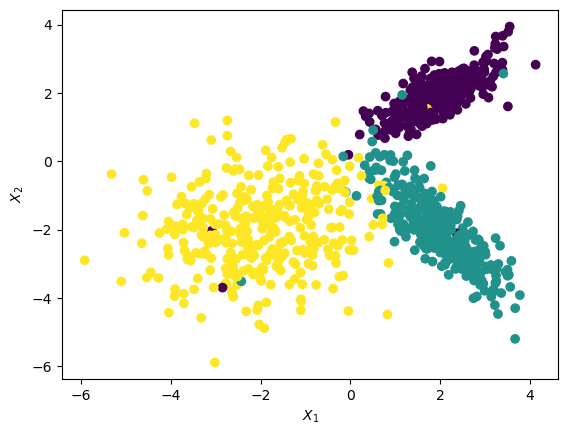

In [45]:
n = 1000
p = 2
k = 3
np.random.seed(1)

X, y = make_classification(n_samples=n,n_features=2,n_classes=3,
                           n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=1,
                            class_sep=2.0)

y_ohe = One_Hot_Encoder(y)

plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

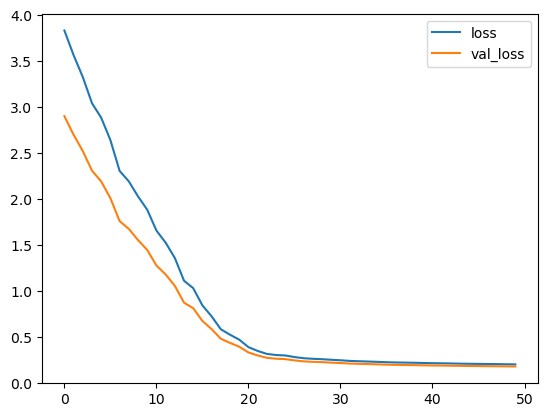

In [59]:
train_size = round(X.shape[0]*0.8)

X_train = X[:train_size]
y_train = y_ohe[:train_size,:] 

val_data = (X[train_size:],y_ohe[train_size:,:])

multi_log_reg = MultiLogisticRegression()

multi_log_reg.fit(X_train,y_train,epochs=50,batch_size=32,lr=0.1,val_data=val_data,seed=1)

df = pd.DataFrame(multi_log_reg.history)

df.plot(kind='line')
plt.show()

In [60]:
loss = multi_log_reg.loss(X_train,y_train)
accuracy = multi_log_reg.accuracy(X_train,y_train)
print('train loss : {:.4f}\ntrain accuracy : {:.4f} '.format(loss,accuracy))

train loss : 0.2029
train accuracy : 0.9475 


In [61]:
val_loss = multi_log_reg.loss(val_data[0],val_data[1])
val_accuracy = multi_log_reg.accuracy(val_data[0],val_data[1])
print('val loss : {:.4f}\nval accuracy : {:.4f} '.format(val_loss,val_accuracy))

val loss : 0.1799
val accuracy : 0.9600 


In [62]:
multi_log_reg.weights

array([[ 0.53428296,  1.04009432, -1.08996008],
       [ 0.33878993, -1.16579883, -1.68209079]])

In [63]:
multi_log_reg.bias

array([[1.07827766, 0.09470223, 0.12966406]])